23661
Epoch 1/40
150/150 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.9179
Epoch 00001: val_loss improved from inf to 0.85779, saving model to ./AUC_binary_classification_20200107/for_0_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5
150/150 [==============================] - 10s 64ms/step - loss: 0.4773 - accuracy: 0.9179 - val_loss: 0.8578 - val_accuracy: 0.5381
Epoch 2/40
150/150 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.9249
Epoch 00002: val_loss improved from 0.85779 to 0.25354, saving model to ./AUC_binary_classification_20200107/for_0_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5
150/150 [==============================] - 9s 59ms/step - loss: 0.2723 - accuracy: 0.9249 - val_loss: 0.2535 - val_accuracy: 0.9443
Epoch 3/40
150/150 [==============================] - ETA: 0s - loss: 0.4010 - accuracy: 0.8638
Epoch 00003: val_loss i

Epoch 8/40
150/150 [==============================] - ETA: 0s - loss: 0.2264 - accuracy: 0.9499
Epoch 00008: val_loss did not improve from 0.02313
150/150 [==============================] - 9s 59ms/step - loss: 0.2264 - accuracy: 0.9499 - val_loss: 0.0409 - val_accuracy: 0.9883
Epoch 9/40
150/150 [==============================] - ETA: 0s - loss: 0.1750 - accuracy: 0.9660
Epoch 00009: val_loss did not improve from 0.02313
150/150 [==============================] - 8s 57ms/step - loss: 0.1750 - accuracy: 0.9660 - val_loss: 0.2793 - val_accuracy: 0.9055
Epoch 10/40
149/150 [============================>.] - ETA: 0s - loss: 0.1540 - accuracy: 0.9700
Epoch 00010: val_loss did not improve from 0.02313
150/150 [==============================] - 9s 59ms/step - loss: 0.1541 - accuracy: 0.9700 - val_loss: 0.2910 - val_accuracy: 0.9050
Epoch 11/40
150/150 [==============================] - ETA: 0s - loss: 0.1079 - accuracy: 0.9726
Epoch 00011: val_loss improved from 0.02313 to 0.02276, saving mo

Epoch 2/40
149/150 [============================>.] - ETA: 0s - loss: 0.2772 - accuracy: 0.9318
Epoch 00002: val_loss improved from 0.66548 to 0.10597, saving model to ./AUC_binary_classification_20200107/for_5_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5
150/150 [==============================] - 8s 56ms/step - loss: 0.2829 - accuracy: 0.9309 - val_loss: 0.1060 - val_accuracy: 0.9939
Epoch 3/40
150/150 [==============================] - ETA: 0s - loss: 0.3353 - accuracy: 0.9006
Epoch 00003: val_loss improved from 0.10597 to 0.04243, saving model to ./AUC_binary_classification_20200107/for_5_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5
150/150 [==============================] - 9s 57ms/step - loss: 0.3353 - accuracy: 0.9006 - val_loss: 0.0424 - val_accuracy: 0.9953
Epoch 4/40
150/150 [==============================] - ETA: 0s - loss: 0.3183 - accuracy: 0.9263
Epoch 00004: val_loss did 

150/150 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9702
Epoch 00013: val_loss did not improve from 0.04305
150/150 [==============================] - 8s 57ms/step - loss: 0.1465 - accuracy: 0.9702 - val_loss: 0.2161 - val_accuracy: 0.9284
Epoch 14/40
150/150 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9751
Epoch 00014: val_loss did not improve from 0.04305
150/150 [==============================] - 9s 57ms/step - loss: 0.1192 - accuracy: 0.9751 - val_loss: 0.2115 - val_accuracy: 0.9345
Epoch 15/40
150/150 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9796
Epoch 00015: val_loss did not improve from 0.04305
150/150 [==============================] - 8s 56ms/step - loss: 0.0928 - accuracy: 0.9796 - val_loss: 0.0523 - val_accuracy: 0.9892
Epoch 16/40
150/150 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 0.9708
Epoch 00016: val_loss did not improve from 0.04305
150/150 [===============

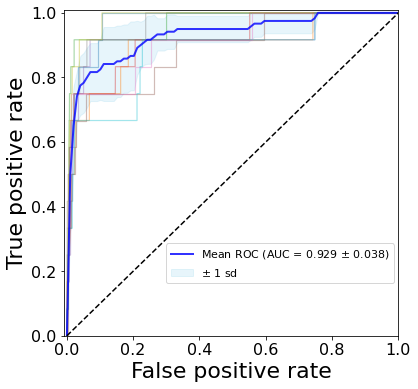

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pb
import math
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
import time
from scipy import sparse
import os
from scipy.stats import linregress
import copy
from scipy.stats import pearsonr,spearmanr
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import metrics
def banland_sample(feature,target,proportion):#For up-sampling
    feature=list(np.array(feature))
    target=list(np.array(target))
    resist,non_resist=[],[]
    for i in zip(feature,target):
        if i[1][0]==0:#non-resistance genotype
            non_resist.append(i[0])
        elif i[1][0]==1:#resistance genotype
            resist.append(i[0])
    l_non_resist,l_resist=len(non_resist),len(resist)
    new_x,new_y=[],[]
    id_resist= np.random.choice(l_resist,int((l_non_resist-l_resist)*proportion))#upsampling
    new_x.extend(non_resist)
    new_y.extend([[0]]*l_non_resist)
    if len(new_x)==len(new_y):
        new_x.extend(resist)
        new_y.extend([[1]]*l_resist)
        resist=np.array(resist)
        up_resist=resist[id_resist]
        new_x.extend(up_resist)
        new_y.extend([[1]]*len(id_resist))
        new_x=np.array(new_x)
        new_y=np.array(new_y)
    else:    
        print("error,make double check of input")
    return new_x,new_y
with open("caz_0.5mic_9-26_binary_10_no_balance_mutiple_.csv","r") as input1:
    x_list,y_list=[],[]
    for line in input1:
        if "po" not in line:
            line_list=line.strip().split()      
            fea=np.array(line_list[:-1]).reshape((-1,4))
            x_list.append(fea)#list of feature
            y_list.append(line_list[-1])#list of target

x_array=np.array(x_list).astype(np.float32)
y_array=np.array(y_list).astype(np.float32).reshape((-1,1))
auc_dict={}
random_num=0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for au in range(10):#10 randomly separated dataset
    #split trainning set and test set
    xx_train, xx_test, yy_train, yy_test = train_test_split(x_array, y_array, test_size=2300,stratify =y_array,random_state=random_num+au)
    x = tf.convert_to_tensor(xx_train)
    y = tf.convert_to_tensor(yy_train, dtype=tf.int32)
    idx = tf.range(xx_train.shape[0])
    idx = tf.random.shuffle(idx)
    ###################split training set and validation set
    x_train, y_train = tf.gather(x, idx[:int(0.90 * len(idx))]), tf.gather(y, idx[:int(0.90 * len(idx))])#trainning set
    x_val, y_val = tf.gather(x, idx[int(0.90 * len(idx)):]), tf.gather(y, idx[int(0.90 * len(idx)):])#validation set
    x_test = tf.convert_to_tensor(xx_test)
    y_test = tf.convert_to_tensor(yy_test, dtype=tf.int32)
    ban_x_train,ban_y_train=banland_sample(x_train,y_train,0.3)#upsampling 30%
    batchsz =128
    db = tf.data.Dataset.from_tensor_slices((ban_x_train, ban_y_train))
    db = db.shuffle(7000).batch(batchsz).repeat()
    db_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    db_val = db_val.batch(batchsz)
    db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    db_test = db_test.batch(batchsz)
    n_units=32
    ##construct BLSTM
    forward_lstm = layers.LSTM(n_units, return_sequences=True) 
    backward_lstm = layers.LSTM(n_units,go_backwards=True,return_sequences=True)
    Bid_lstm = layers.Bidirectional(forward_lstm,merge_mode='concat',backward_layer=backward_lstm)
    ###construct model
    network = Sequential([layers.Conv1D(n_units,strides=1, kernel_size=5, padding='same', activation=tf.nn.relu),#1D convolution
                          layers.MaxPooling1D(13, 13),#1D Max polling
                          layers.Dropout(0.2),
                          Bid_lstm, # BLSTM
                          layers.Flatten(),
                          layers.Dense(40, activation=tf.nn.relu), 
                          layers.Dropout(0.4),
                          layers.Dense(1, activation='sigmoid')])
    network.build(input_shape=(None,792, 4))
    network.compile(optimizer=optimizers.Adam(lr=0.001),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])
    callbacc = [tf.keras.callbacks.ModelCheckpoint(filepath="./AUC_binary_classification_20200107/for_%d_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5"%(au), verbose=1,monitor='val_loss', save_best_only=True),
                tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
    wb={0:1,1:3}#weight non-resistance and resistance genotype 0 and 1,respectively
    ##start trainning
    with tf.device('/gpu:0'):
        network.fit(db, epochs=40, validation_data=db_val,class_weight=wb,shuffle=True,
                    callbacks=callbacc, steps_per_epoch=x_train.shape[0]//batchsz)
        
    #############################
    ##achieve the best model
    network_xx=""
    network_xx = Sequential([layers.Conv1D(n_units,strides=1, kernel_size=5, padding='same', activation=tf.nn.relu), 
                          layers.MaxPooling1D(13, 13), 
                          layers.Dropout(0.2),
                          Bid_lstm, 
                          layers.Flatten(),
                          layers.Dense(40, activation=tf.nn.relu), 
                          layers.Dropout(0.4),
                          layers.Dense(1, activation='sigmoid')])
    network_xx.build(input_shape=(None,792, 4))
    network_xx.compile(optimizer=optimizers.Adam(lr=0.001),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])
    network_xx.load_weights("./AUC_binary_classification_20200107/for_%d_AUC_test_binary10_weights_maxpool_13_drop_0.2-0.4_batch128_kersize5_wb3_dense40_11-15.best.hdf5"%(au))
    pre=network_xx.predict(x_test)#use test set for predicting
    lable_list=[]
    pro_list=[]
    for pred in zip(pre,y_test):
        lable_list.append(pred[1][0])
        pro_list.append(pred[0][0])
    y_label = np.array(lable_list)
    predict = np.array(pro_list)
    
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_label, predict)
    auc_dict[au]=(fpr_test, tpr_test, threshold_test)
    interp_tpr = np.interp(mean_fpr, fpr_test, tpr_test)
    #print(interp_tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr_test,tpr_test))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
fxx=plt.figure(figsize=(6,6))

for ui in auc_dict.keys():
   plt.plot(auc_dict[ui][0],auc_dict[ui][1],alpha=0.4, lw=1.2)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='skyblue', alpha=.2,
                label=r'$\pm$ 1 sd')

font1 = {'family' : 'Sans','weight' : 'normal','size'   : 11}

plt.legend(bbox_to_anchor=(0.29, 0.3),prop=font1)
plt.plot([0, 1], [0, 1],'--',color="black")
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True positive rate',fontsize=22,family="Sans")
plt.xlabel('False positive rate',fontsize=22,family="Sans")
plt.tick_params(labelsize=16)
plt.savefig('figure4_color_C_mean_AUC_11-18.pdf', bbox_inches='tight',dpi=300) 
plt.show()